# Cardiovascular Data Analysis

Hi, welcome to this workshop on walking through some simple algorithms of machine learning!

Dataset:
1. Sex (M/ F)
2. Age 
3. Duration of Symptoms for CAD
4. Cholesterol Level
5. Significant CAD? (1/0)
6. Three Vessel or Left Main Disease? (1/0)

Today, we're going to review:
1. Linear Regression
2. Logistic Regression
3. Cluster Analysis


## Import Libraries to Conduct Analysis

In [2]:
import pandas as pd
import numpy as np
import matplotlib
from matplotlib import *
from matplotlib import pyplot as plt

# from IPython.display import display
import random
random.seed(9001)

# import piping and linear models
from sklearn import linear_model, decomposition, datasets
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

%matplotlib inline

## 0. Import Data And Summarize

It's important to understand the data and some basic characteristics before analyzing it. Here we see that the disease output is either 0, or 1, so we want to do a binary classification. 

Objective: Our objective is to find a boundary between disease, or not diseased based on our features, age, sex, symptom duration, and cholesterol level.

*** No CODEPAGE record, no encoding_override: will use 'ascii'
Age nan's,  0
CAD Symptom Duration nan's,  0
Cholesterol nan's,  1246
Significant CAD nan's,  0
TVDLM nan's,  3


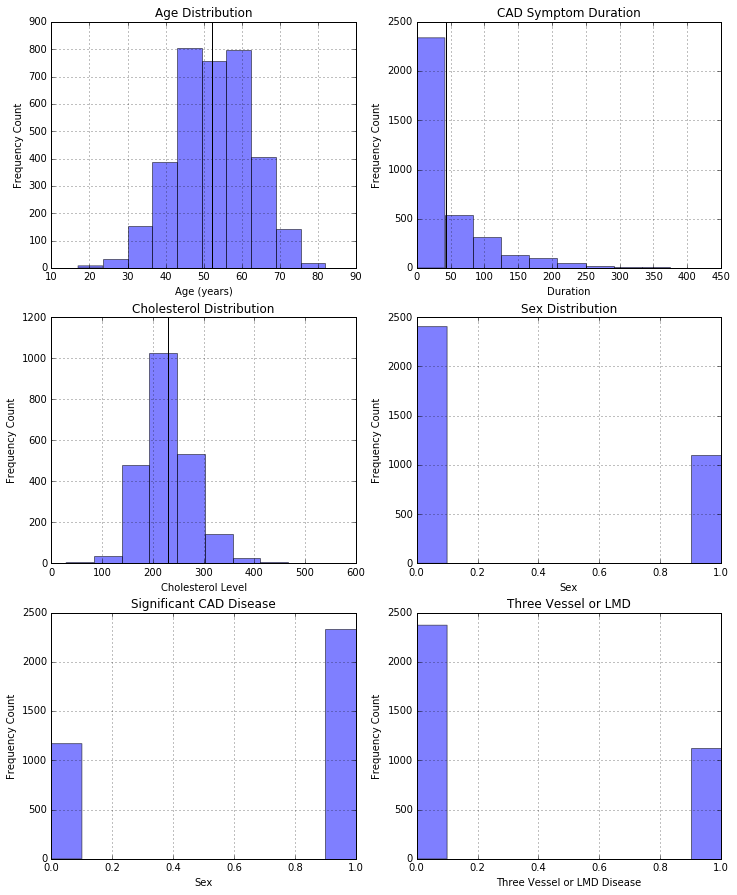

In [3]:
# Use Pandas to read in the excel file
cathdata = pd.read_excel('./acath.xls')

# extract different variables and summarize
sex_list = cathdata['sex']
age_list = cathdata['age']
cadsym_list = cathdata['cad.dur']
chol_list = cathdata['choleste']
sigcad_list = cathdata['sigdz']
tvdlm_list = cathdata['tvdlm']

# Plot summary of each variable
fig = plt.figure(figsize=(12, 15))
plt.subplot(3,2,1)
age_list.hist(alpha=0.5)
plt.axvline(np.mean(age_list), color='black')
plt.title('Age Distribution')
plt.xlabel('Age (years)')
plt.ylabel('Frequency Count')

plt.subplot(3,2,2)
cadsym_list.hist(alpha=0.5)
plt.axvline(np.mean(cadsym_list), color='black')
plt.title('CAD Symptom Duration')
plt.xlabel('Duration')
plt.ylabel('Frequency Count')

plt.subplot(3,2,3)
chol_list.hist(alpha=0.5)
plt.axvline(np.mean(chol_list), color='black')
plt.title('Cholesterol Distribution')
plt.xlabel('Cholesterol Level')
plt.ylabel('Frequency Count')

plt.subplot(3,2,4)
sex_list.hist(alpha=0.5)
plt.title('Sex Distribution')
plt.xlabel('Sex')
plt.ylabel('Frequency Count')

plt.subplot(3,2,5)
sigcad_list.hist(alpha=0.5)
plt.title('Significant CAD Disease')
plt.xlabel('Sex')
plt.ylabel('Frequency Count')

plt.subplot(3,2,6)
tvdlm_list.hist(alpha=0.5)
plt.title('Three Vessel or LMD')
plt.xlabel('Three Vessel or LMD Disease')
plt.ylabel('Frequency Count')

# count number of NaN's
print "Age nan's, ", age_list.isnull().sum()
print "CAD Symptom Duration nan's, ", cadsym_list.isnull().sum()
print "Cholesterol nan's, ", chol_list.isnull().sum()
print "Significant CAD nan's, ", sigcad_list.isnull().sum()
print "TVDLM nan's, ", tvdlm_list.isnull().sum()

## 1. Apply Logistic Regression on Significant CAD or Three Vessel Disease

An example of logistic regression
![title](figures/logregression.png)

In [4]:
# drop nan entries of data
cleanedcathdata = cathdata.dropna()

# initialize the logistic model 
logistic = linear_model.LogisticRegression()

# initialize the prinicple component analysis 
pca = decomposition.PCA()

# create a pipe of our different operations
pipe = Pipeline(steps=[('pca', pca), ('logistic', logistic)])
